In [2]:
from vector_auto_regression import VectorAutoRegressor, run_var_test
import model1
import articles as art
import random
import csv
import pandas as pd
import numpy as np
import pickle

In [29]:
#articles_guardian = art.load_articles_guardian()
#articles_ft = art.load_articles_ft()
#articles = articles_ft + articles_guardian

# MODEL 1
#sentiment = model1.timespan_sentiment(articles, 2000, 2020)


# MODEL 2
sentiment = pd.read_csv('summary_sentiment.csv', parse_dates=['Date'], index_col='Date',
                                        usecols=['Date', 'Positive Scores', 'Negative Scores'])
#sentiment.index = pd.to_datetime(sentiment.index, format="%b-%y")
sentiment.index = sentiment.index.to_period("M")

# --------------------
negative_sentiment = sentiment[["Negative Scores"]]
positive_sentiment = sentiment[["Positive Scores"]]

### Negative sentiment / Direct market

In [31]:
forecast_period = pd.period_range(start="%d-1" % 2002, end="%d-12" % 2020, freq='M')

In [33]:
direct_path = "data/real_estate_data/direct/england.csv"
var_neg_direct = VectorAutoRegressor(housing_index=direct_path, sentiment_index = negative_sentiment, housing_column = "House price index")
#var_neg_direct.test_lags()# --> 3


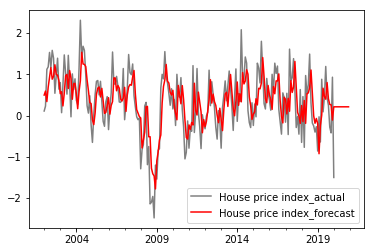

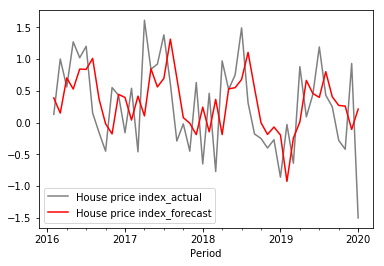

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Apr, 2020
Time:                     13:07:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.66171
Nobs:                     189.000    HQIC:                  -6.80456
Log likelihood:           129.865    FPE:                 0.00100600
AIC:                     -6.90184    Det(Omega_mle):     0.000935427
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.084903         0.046193            1.838           0.066
L1.House price index         0.539119         0.071942            7.494           0.000
L1.Negative Scores  

In [34]:
var_neg_direct.fit_model(lag_order = 3)

#Forecast of whole dataset
var_neg_direct.forecast_period(forecast_period)

# Forecast of test set
var_neg_direct.forecast_period(var_neg_direct.test_data.index)

var_neg_direct.fit.summary()

### Positive sentiment / Direct market

In [36]:
var_pos_direct = VectorAutoRegressor(housing_index=direct_path, sentiment_index = positive_sentiment, housing_column = "House price index")
#var_pos_direct.test_lags()

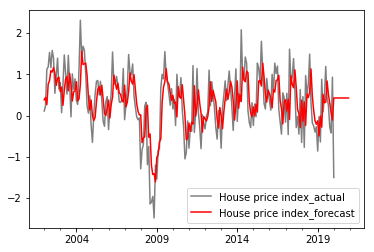

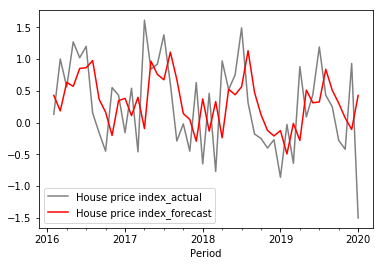

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Apr, 2020
Time:                     13:10:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.56069
Nobs:                     189.000    HQIC:                  -6.70354
Log likelihood:           120.319    FPE:                 0.00111294
AIC:                     -6.80082    Det(Omega_mle):      0.00103486
--------------------------------------------------------------------
Results for equation House price index
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.095257         0.047371            2.011           0.044
L1.House price index         0.556269         0.073460            7.572           0.000
L1.Positive Scores  

In [40]:
var_pos_direct.fit_model(lag_order = 3)

#Forecast of whole dataset
var_pos_direct.forecast_period(forecast_period)

# Forecast of test set
var_pos_direct.forecast_period(var_pos_direct.test_data.index)

var_pos_direct.fit.summary()

### Negative sentiment / Securitized market

In [41]:
securitized_data = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'
var_neg_securitized = VectorAutoRegressor(housing_index=securitized_data, sentiment_index = negative_sentiment,
                                          housing_column = "Price", date_format="%b %y")
forecast_period = pd.period_range(start="%d-1" % 2005, end="%d-12" % 2019, freq='M')

#var_neg_securitized.test_lags() --> 2

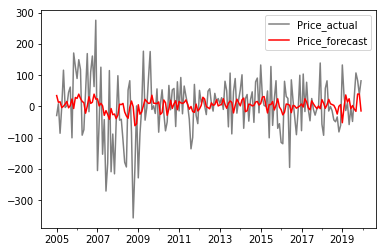

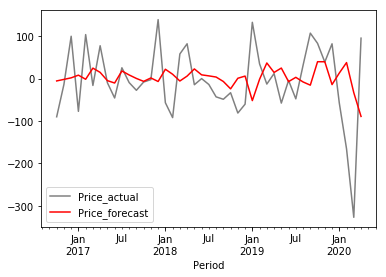

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Apr, 2020
Time:                     13:11:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.20096
Nobs:                     169.000    HQIC:                   3.09091
Log likelihood:          -724.433    FPE:                    20.4052
AIC:                      3.01576    Det(Omega_mle):         19.2494
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      2.753515         7.143155            0.385           0.700
L1.Price                   0.143294         0.078199            1.832           0.067
L1.Negative Scores      -159.659842     

In [45]:
var_neg_securitized.fit_model(lag_order = 2)

#Forecast of whole dataset
var_neg_securitized.forecast_period(forecast_period)

# Forecast of test set
var_neg_securitized.forecast_period(var_neg_securitized.test_data.index)

var_neg_securitized.fit.summary()

### Positive sentiment / Securitzed market

In [20]:
securitized_data = 'data/real_estate_data/securitized/FTSE EPRA_NAREIT UK Historical Data.csv'
var_pos_securitized = VectorAutoRegressor(housing_index=securitized_data, sentiment_index = positive_sentiment,
                                          housing_column = "Price", date_format="%b %y")
forecast_period = pd.period_range(start="%d-1" % 2005, end="%d-12" % 2019, freq='M')

#var_pos_securitized.test_lags() --> 4/5

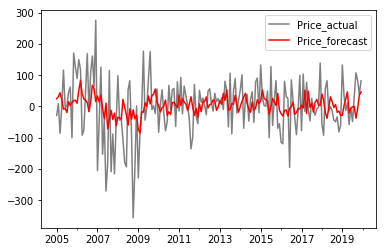

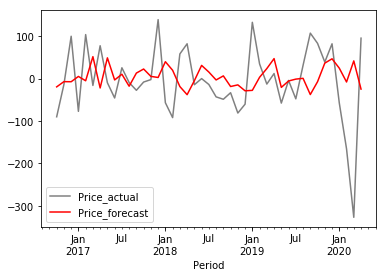

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Apr, 2020
Time:                     22:47:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.05405
Nobs:                     167.000    HQIC:                  -3.25372
Log likelihood:          -172.850    FPE:                  0.0337116
AIC:                     -3.39012    Det(Omega_mle):       0.0303519
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      2.868260         7.112532            0.403           0.687
L1.Price                   0.116627         0.078472            1.486           0.137
L1.Positive Scores     -1501.212200     

In [23]:
var_pos_securitized.fit_model(lag_order = 4)

#Forecast of whole dataset
var_pos_securitized.forecast_period(forecast_period)

# Forecast of test set
var_pos_securitized.forecast_period(var_pos_securitized.test_data.index)

var_pos_securitized.fit.summary()